<a href="https://colab.research.google.com/github/Rajnandini17/Deep-Learning-projects/blob/main/Fruits_identification_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LOADING THE DATASET AND PARSING IT

In [18]:
!wget https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip

--2023-09-19 17:40:40--  https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/fxn3ldztzwxm0rw/FruitsData.zip [following]
--2023-09-19 17:40:41--  https://www.dropbox.com/s/raw/fxn3ldztzwxm0rw/FruitsData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc520b48ac38ea75ac5f0d4914b2.dl.dropboxusercontent.com/cd/0/inline/CEC8Fp5mUkCt823sTS0L2SQZMw8bfj2tQluAMFBt59WJ-W7gD1rnXoQMw7_86qZ5IbOrBl7PcQeGwMa5Ifnohywc-zkwrJxnxhmX9tuLbT5cjb_uLL360zOsecuzuZjNageSu6cWO_9RKD9EPl4eWX5f/file# [following]
--2023-09-19 17:40:41--  https://uc520b48ac38ea75ac5f0d4914b2.dl.dropboxusercontent.com/cd/0/inline/CEC8Fp5mUkCt823sTS0L2SQZMw8bfj2tQluAMFBt59WJ-W7gD1rnXoQMw7_86qZ5IbOrBl7PcQeGwMa5Ifnohywc-zkwr

In [15]:
!unzip -q "/content/FruitsData.zip"

[/content/FruitsData.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/FruitsData.zip or
        /content/FruitsData.zip.zip, and cannot find /content/FruitsData.zip.ZIP, period.


In [ ]:
#importing the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [ ]:
#creating pathlib objects
train_path = Path("fruits-360/Training")
test_path = Path("Fruits-360/Test")

In [ ]:
#Getting Image paths
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x), train_image_paths))

train_image_paths[:10]

[]

In [ ]:
#getting their respective labels
def get_label(image_path):
  return image_path.split("/")[-2]

train_image_labels = list(map(lambda x: get_label(x), train_image_paths))
train_image_labels[:10]

['Maracuja',
 'Maracuja',
 'Maracuja',
 'Maracuja',
 'Maracuja',
 'Maracuja',
 'Maracuja',
 'Maracuja',
 'Maracuja',
 'Maracuja']

In [ ]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)
train_image_labels[:10]

array([67, 67, 67, 67, 67, 67, 67, 67, 67, 67])

In [ ]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(train_image_paths , train_image_labels)

In [ ]:
Train_paths[:10] , Train_labels[:10]

(['fruits-360/Training/Eggplant/69_100.jpg',
  'fruits-360/Training/Peach 2/r_191_100.jpg',
  'fruits-360/Training/Apple Crimson Snow/184_100.jpg',
  'fruits-360/Training/Peach Flat/121_100.jpg',
  'fruits-360/Training/Pineapple Mini/8_100.jpg',
  'fruits-360/Training/Onion Red/129_100.jpg',
  'fruits-360/Training/Apple Braeburn/127_100.jpg',
  'fruits-360/Training/Pomelo Sweetie/r_141_100.jpg',
  'fruits-360/Training/Tomato Heart/r2_166_100.jpg',
  'fruits-360/Training/Grape Pink/214_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

##TRANSFORMATION OF IMAGE DATA

In [ ]:
# function used for transformation
def load(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels = 3)
  return image, label

In [ ]:
#defining image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32
#basic transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])
#Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [ ]:
#function used to create tensorflow object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths, labels, train = True):
  image_paths = tf.convert_to_tensor(paths)
  labels = tf.convert_to_tensor(labels)

  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  label_dataset = tf.data.Dataset.from_tensor_slices(labels)

  dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

  dataset = dataset.map(lambda image, label : load(image, label))
  dataset = dataset.map(lambda image, label : (resize(image), label), num_parallel_calls=AUTOTUNE)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(BATCH_SIZE)

  if train:
    dataset = dataset.map(lambda image, label : (data_augmentation(image), label), num_parallel_calls = AUTOTUNE)

  dataset = dataset.repeat()
  return dataset

In [ ]:
#creating train dataset object & verifying it
%time train_dataset = get_dataset(Train_paths, Train_labels)
image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 581 ms, sys: 46.2 ms, total: 627 ms
Wall time: 678 ms
(32, 224, 224, 3)
(32, 131)


Mango Red


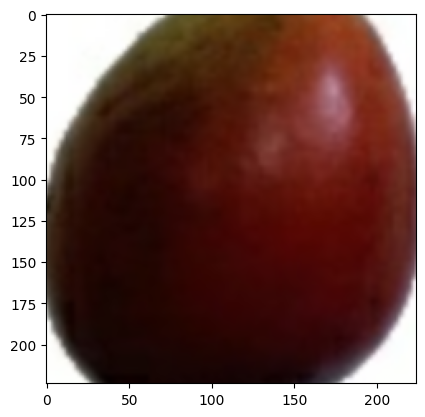

In [ ]:
#viewing sample training image
print(Le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [ ]:
%time val_dataset = get_dataset(Val_paths, Val_labels, train = False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 62.6 ms, sys: 1.39 ms, total: 64 ms
Wall time: 133 ms
(32, 224, 224, 3)
(32, 131)


Peach 2


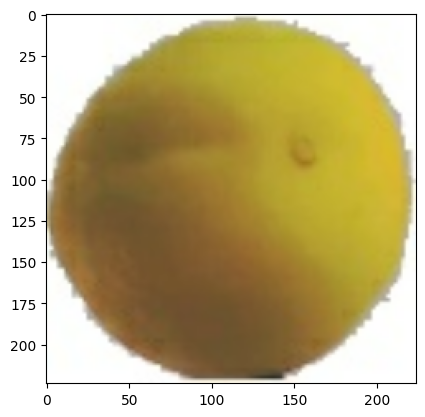

In [ ]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

## BUILDING TENSORFLOW MODEL

In [ ]:
from tensorflow.keras.applications import ResNet50V2

backbone = ResNet50V2(
    input_shape = (224, 224, 3),
    include_top = False
)
model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Dropout(0.3),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(131, activation='softmax')
    tf.keras.layers.Dense(131, activation="softmax")
])
model.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 131)               268419    
                                                                 
Total params: 23833219 (90.92 MB)
Trainable params: 23787779 (90.74 MB)
Non-trainable params: 45440 (177.50 KB)
_________________________________________________________________


In [ ]:
#compiling the model by providing optimizer, loss and metrics
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2= 0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(name = 'precision'), tf.keras.metrics.Recall(name = 'recall')]
)

##TRAINING THE MODEL

In [ ]:
history = model.fit(
    train_dataset,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 1,
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

1586/1586 [==============================] - 703s 413ms/step - loss: 0.4463 - accuracy: 0.8747 - precision: 0.9333 - recall: 0.8398 - val_loss: 2.2206 - val_accuracy: 0.5784 - val_precision: 0.6095 - val_recall: 0.5553


In [ ]:
#turning off the backbone
model.layers[0].trainable = False

In [ ]:
#defining the callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5", verbose = 1, save_best_only = True, save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience = 4)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 131)               268419    
                                                                 
Total params: 23833219 (90.92 MB)
Trainable params: 268419 (1.02 MB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
#training the phase2 of model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 8,
    callbacks = [checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,

)

Epoch 1/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0865 - accuracy: 0.9729 - precision: 0.9760 - recall: 0.9701
Epoch 1: val_loss improved from inf to 2.97514, saving model to best_weights.h5
1586/1586 [==============================] - 638s 401ms/step - loss: 0.0865 - accuracy: 0.9729 - precision: 0.9760 - recall: 0.9701 - val_loss: 2.9751 - val_accuracy: 0.5239 - val_precision: 0.5615 - val_recall: 0.5055
Epoch 2/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.9812 - precision: 0.9828 - recall: 0.9792
Epoch 2: val_loss improved from 2.97514 to 2.80839, saving model to best_weights.h5
1586/1586 [==============================] - 619s 389ms/step - loss: 0.0627 - accuracy: 0.9812 - precision: 0.9828 - recall: 0.9792 - val_loss: 2.8084 - val_accuracy: 0.5814 - val_precision: 0.6148 - val_recall: 0.5682
Epoch 3/8
 362/1586 [=====>........................] - ETA: 6:58 - loss: 0.0566 - accuracy: 0.9818 - precision: 0.9831 - recall: 0

In [ ]:
# #Building inceptionV3 model
# from tensorflow.keras.applications import InceptionV3

# backbone = InceptionV3(
#     input_shape = (224, 224, 3),
#     include_top = False
# )
# model = tf.keras.Sequential([
#     backbone,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(131, activation='softmax')
# ])

# model.summary()

In [ ]:
# #Building EfficientNetB3 model
# from tensorflow.keras.applications import EfficientNetB3

# backbone = EfficientNetB3(
#     input_shape = (224, 224, 3),
#     include_top = False
# )
# model = tf.keras.Sequential([
#     backbone,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(131, activation='softmax')
# ])

# model.summary()

##TESTING PHASE

In [ ]:
from tensorflow.keras.applications import EfficientNetB3

backbone = EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
model.load_weights("best_weights.h5")

In [ ]:
# Create a Dataset Object for 'Testing' Set just the way we did for Training and Validation
test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x) , test_image_paths))
test_labels = list(map(lambda x : get_label(x) , test_image_paths))

test_labels = Le.transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

test_image_paths = tf.convert_to_tensor(test_image_paths)
test_labels = tf.convert_to_tensor(test_labels)

def decode_image(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = tf.image.resize(image , [224 , 224] , method="bilinear")
    return image , label

test_dataset = (
     tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(BATCH_SIZE)
)

In [ ]:
# Verify Test Dataset Object
image , label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

In [ ]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [ ]:
# Evaluating the loaded model
loss, acc, prec, rec = model.evaluate(test_dataset)

print(" Testing Acc : " , acc)
print(" Testing Precision " , prec)
print(" Testing Recall " , rec)

##REAL-TIME PREDICTION

In [ ]:
def LoadImage(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = tf.image.resize(image , [224 , 224] , method="bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image , 0)
    return image

def RealtimePrediction(image_path , model, encoder_):
    image = LoadImage(image_path)
    prediction = model.predict(image)
    prediction = np.argmax(prediction , axis = 1)
    return encoder_.inverse_transform(prediction)[0]

In [ ]:
RealtimePrediction("/content/fruits-360/Training/Apple Braeburn/100_100.jpg" , model , Le)